## IMPORTACIÓN DE LIBRERÍAS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

## LECTURA Y EXPLORACIÓN DE LOS DATOS

In [2]:
df = pd.read_csv(r"C:\Users\Owner\Documents\GitHub\Machine Learning Course\datasets\boston/Boston.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


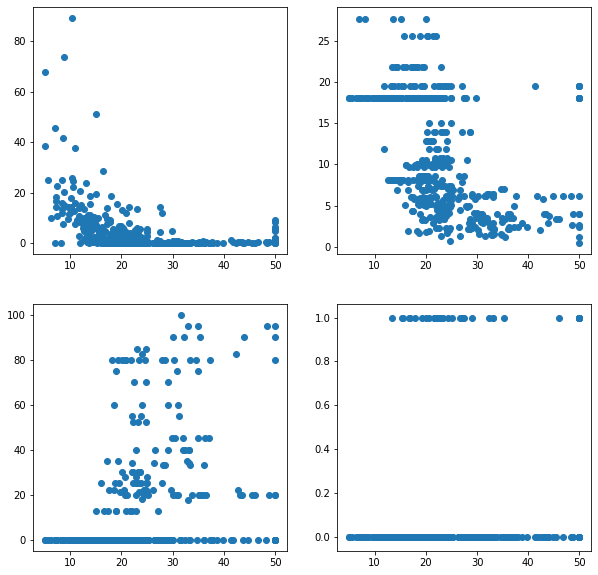

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(df.medv, df.crim)
axs[1, 0].scatter(df.medv, df.zn)
axs[0, 1].scatter(df.medv, df.indus)
axs[1, 1].scatter(df.medv, df.chas)

plt.show()

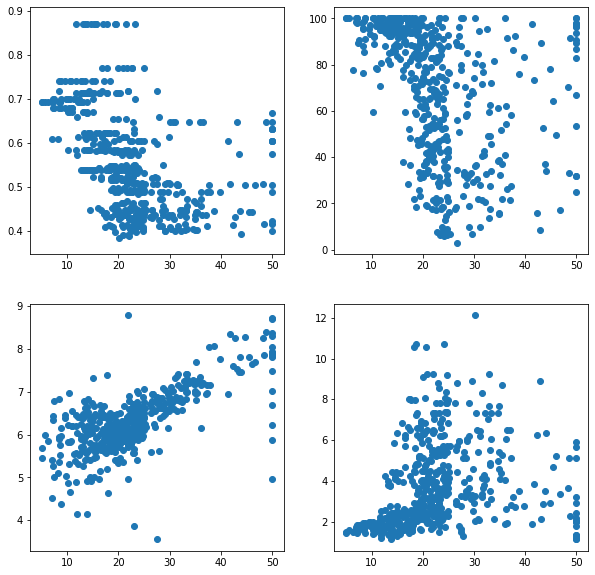

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(df.medv, df.nox)
axs[1, 0].scatter(df.medv, df.rm)
axs[0, 1].scatter(df.medv, df.age)
axs[1, 1].scatter(df.medv, df.dis)

plt.show()

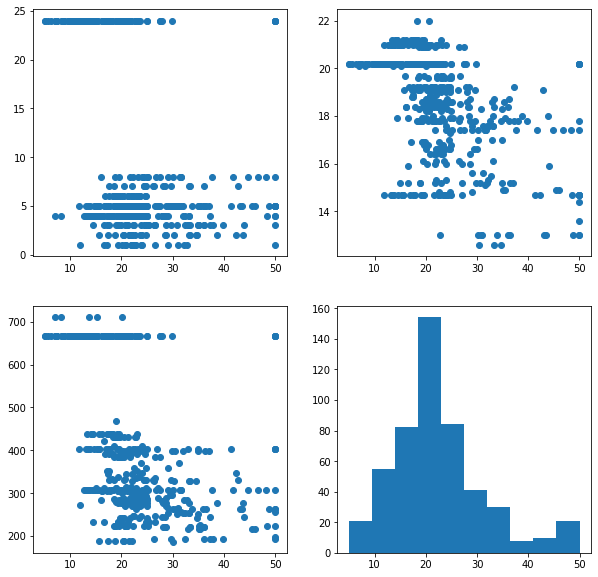

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(df.medv, df.rad)
axs[1, 0].scatter(df.medv, df.tax)
axs[0, 1].scatter(df.medv, df.ptratio)
axs[1, 1].hist(df.medv)

plt.show()

## SELECCIÓN DE VARIABLES PREDICTORAS Y A PREDECIR

In [13]:
colnames = df.columns.values.tolist()
predictors = colnames[:13]

X = df[predictors]
Y = df.medv

## IMPLEMENTACIÓN DEL ALGORITMO RANDOM FOREST REGRESION

In [9]:
forest = RandomForestRegressor(n_jobs=2, oob_score=True, n_estimators=500)
forest.fit(X,Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=2, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [10]:
df['predicción'] = forest.oob_prediction_
df[['predicción', 'medv']]

,predicción,medv
0,28.492784,24.0
1,22.425543,21.6
2,34.645699,34.7
3,35.126667,33.4
4,34.217964,36.2
...,...,...
501,24.045876,22.4
502,18.302128,20.6
503,27.886170,23.9
504,25.820541,22.0


### EFICACIA DE LA REGRESIÓN

In [11]:
forest.oob_score_

0.8762701645259932

### ERROR PROMEDIO

In [12]:
df["error"] = (df["predicción"]-df["medv"])**2
sum(df["predicción"])/len(df)

22.539537318420404